The contents of this notebook are copied / redistributed from [Monai tutorials](https://github.com/Project-MONAI/tutorials/blob/main/2d_classification/mednist_tutorial.ipynb).

                Copyright (c) MONAI Consortium  
                Licensed under the Apache License, Version 2.0 (the "License");  
                you may not use this file except in compliance with the License.  
                You may obtain a copy of the License at  
                &nbsp;&nbsp;&nbsp;&nbsp;http://www.apache.org/licenses/LICENSE-2.0  
                Unless required by applicable law or agreed to in writing, software  
                distributed under the License is distributed on an "AS IS" BASIS,  
                WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.  
                See the License for the specific language governing permissions and  
                limitations under the License.

# Open Access datasets:- The MedNIST Dataset

In this tutorial, we introduce the MedNIST datasetm one of the freely available medical datasets. 

We'll go through the following steps:
* Set up our environment
* Download MedNIST dataset
* Visually explore our dataset

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AFRICAI-MICCAI/model_development_1_data/blob/main/Notebooks/1-%20Datasets-MedNist.ipynb)

## Setup environment

In most of the lessons for this summer school, we use one of the popular frameworks in Machine and deep learning projects named as MONAI.
To set our environment, we first have to download the MONAI library.

In [ ]:
!python -c "import monai" || pip install -q "monai-weekly[pillow, tqdm]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

## Setup imports

In [ ]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
import PIL
import torch
import numpy as np

from monai.apps import download_and_extract

MONAI version: 1.1.0+2.g97918e46
Numpy version: 1.22.2
Pytorch version: 1.13.0a0+d0d6b1f
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 97918e46e0d2700c050e678d72e3edb35afbd737
MONAI __file__: /workspace/monai/monai-in-dev/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.10
Nibabel version: 4.0.2
scikit-image version: 0.19.3
Pillow version: 9.0.1
Tensorboard version: 2.10.1
gdown version: 4.6.0
TorchVision version: 0.14.0a0
tqdm version: 4.64.1
lmdb version: 1.3.0
psutil version: 5.9.2
pandas version: 1.4.4
einops version: 0.6.0
transformers version: 4.21.3
mlflow version: 2.0.1
pynrrd version: 1.0.0

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



## Setup data directory

You can specify a directory with the `MONAI_DATA_DIRECTORY` environment variable.  
This allows you to save results and reuse downloads.  
If not specified a temporary directory will be used.

In [ ]:
directory = os.environ.get("MONAI_DATA_DIRECTORY")
root_dir = tempfile.mkdtemp() if directory is None else directory
print(root_dir)

/workspace/data


## Download dataset

The MedNIST dataset was gathered from several sets from [TCIA](https://wiki.cancerimagingarchive.net/display/Public/Data+Usage+Policies+and+Restrictions),
[the RSNA Bone Age Challenge](http://rsnachallenges.cloudapp.net/competitions/4),
and [the NIH Chest X-ray dataset](https://cloud.google.com/healthcare/docs/resources/public-datasets/nih-chest).

The dataset is kindly made available by [Dr. Bradley J. Erickson M.D., Ph.D.](https://www.mayo.edu/research/labs/radiology-informatics/overview) (Department of Radiology, Mayo Clinic)
under the Creative Commons [CC BY-SA 4.0 license](https://creativecommons.org/licenses/by-sa/4.0/).

If you use the MedNIST dataset, please acknowledge the source.

In [ ]:
resource = "https://github.com/Project-MONAI/MONAI-extra-test-data/releases/download/0.8.1/MedNIST.tar.gz"
md5 = "0bc7306e7427e00ad1c5526a6677552d"

compressed_file = os.path.join(root_dir, "MedNIST.tar.gz")
data_dir = os.path.join(root_dir, "MedNIST")
if not os.path.exists(data_dir):
    download_and_extract(resource, compressed_file, root_dir, md5)

## Read image filenames from the dataset folders

First of all, check the dataset files and show some statistics.  
There are 6 folders in the dataset: Hand, AbdomenCT, CXR, ChestCT, BreastMRI, HeadCT,  
which should be used as the labels to train our classification model.

In [ ]:
# Get class names from the name of each data directory
class_names = sorted(x for x in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, x)))
num_class = len(class_names)

# Get image files of each image class
image_files = [
    [os.path.join(data_dir, class_names[i], x) for x in os.listdir(os.path.join(data_dir, class_names[i]))]
    for i in range(num_class)
]

# Get the number of image samples in each image class
num_each = [len(image_files[i]) for i in range(num_class)]
image_files_list = []
image_class = []

# Get all image files in one list
for i in range(num_class):
    image_files_list.extend(image_files[i])
    image_class.extend([i] * num_each[i])
num_total = len(image_class)

# Get the width and height of one of the images as a reference
image_width, image_height = PIL.Image.open(image_files_list[0]).size

print(f"Total image count: {num_total}")
print(f"Image dimensions: {image_width} x {image_height}")
print(f"Label names: {class_names}")
print(f"Label counts: {num_each}")

Total image count: 58954
Image dimensions: 64 x 64
Label names: ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Label counts: [10000, 8954, 10000, 10000, 10000, 10000]


## Randomly pick images from the dataset to visualize and check

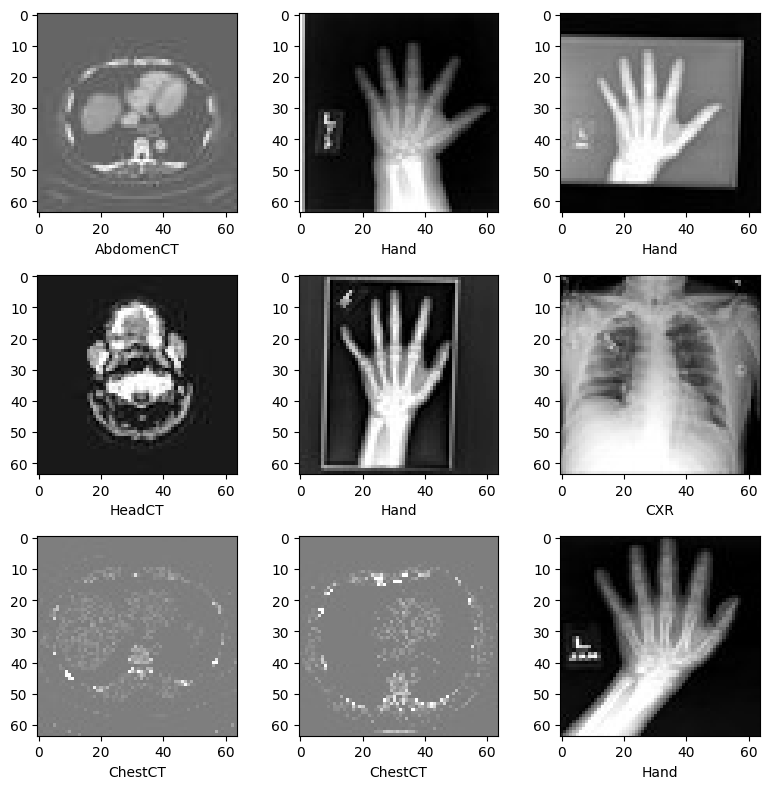

In [ ]:
plt.subplots(3, 3, figsize=(8, 8))
for i, k in enumerate(np.random.randint(num_total, size=9)):
    im = PIL.Image.open(image_files_list[k])
    arr = np.array(im)
    plt.subplot(3, 3, i + 1)
    plt.xlabel(class_names[image_class[k]])
    plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
plt.tight_layout()
plt.show()

### Excercise


Let us now visualize each type of image in our dataset. As we have seen abovem the MedNIST dataset contains quite a lot of images 
in each catagory. Unless we use a dedicated viewer, it is not convinient to browse through them all.

But in this excercise, we will attempt to see 3 random images from each catagory.

In [ ]:
# Instructions 
# we restructure and use the previous code block! 
# Red dotted lines to be replaced with the proper code


# Add a loop for each label in the class name
---------------------------------
  # visualizing 3 random images of each type of label, one row and 3 columns
  plt.subplots(1, 3, figsize=(8, 8))

  for i, k in enumerate(np.random.randint(-----------, size=3)): # Select random int from the total of each image type (HINT: num_each)
      im = PIL.Image.open(-------------) # Open the proper image file (HINT: from image_files)
      arr = np.array(im)
      plt.subplot(1, 3, i + 1) 
      plt.xlabel(------) # Add the proper label here
      plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
  plt.tight_layout()
  plt.show()

### Solution

In [ ]:
# Let us visualize 3 random images of each type of label.
plt.subplots(1, 3, figsize=(8, 8))
for label_idx, label in enumerate(class_names):
  for i, k in enumerate(np.random.randint(num_each[label_idx], size=3)):
      im = PIL.Image.open(image_files[label_idx][k])
      arr = np.array(im)
      plt.subplot(1, 3, i + 1)
      plt.xlabel(label)
      plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
  plt.tight_layout()
  plt.show()

### Cleanup data directory

Remove directory if a temporary was used.

In [ ]:
if directory is None:
    shutil.rmtree(root_dir)